In [126]:
import pandas
import numpy as np
import sklearn.linear_model as orig
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt

In [127]:
X, y, coefs = make_regression(n_samples=50, n_features=4, n_informative=1,
                              noise=10, coef=True, random_state=21)

In [128]:
class LinearRegression:
    def __init__(self):
        self.eps = 0.0001
        self.learning_rate = 0.1
        self.epochs = 100
        self.coef_ = []
        self.intercept_ = 0
        
    def mse_derivative(w, X, y):
        y_pred = X @ w
        return (2 / len(X)) * ((y - y_pred) @ (-X))
    
    def fit(self, X, y):
        X = np.column_stack([X, np.ones((50))])
        # w = weights
        next_w = np.zeros(X.shape[1])
        for i in range(n):
            cur_w = next_w
            next_w = cur_w - learning_rate * mse_derivative(next_w, X, y)
            if np.linalg.norm(cur_w - next_w, ord=2) <= eps:
                break
        self.coef_ = next_w[:-1]
        self.intercept_ = next_w[-1]
        
    def predict(self, X):
        return self.coef_ * X + self.intercept_

In [129]:
model = orig.LinearRegression()
self_model = LinearRegression()
model.fit(X, y)
self_model.fit(X, y)

orig_a = model.coef_
orig_b = model.intercept_
our_a = self_model.coef_
our_b = self_model.intercept_
print(orig_a)
print(our_a, "\n")
print(orig_b)
print(our_b)

[ 0.9787507  -1.89249058 89.51894558 -0.95246586]
[ 0.97835875 -1.89240902 89.51870347 -0.95231892] 

0.7138427517544037
0.7141239763891933


### Как мы видим на примере данных с 4 признаками, разница между оригинальной регрессией и реализованной невелика

### Обучим модели на данных с 1 признаком, чтобы их можно было визуально сравнить на графике

In [130]:
X, y, coefs = make_regression(n_samples=50, n_features=1, n_informative=1,
                              noise=10, coef=True, random_state=21)
model = orig.LinearRegression()
self_model = LinearRegression()
model.fit(X, y)
self_model.fit(X, y)

our_a = self_model.coef_[0]
our_b = self_model.intercept_
skl_a = model.coef_[0]
skl_b = model.intercept_

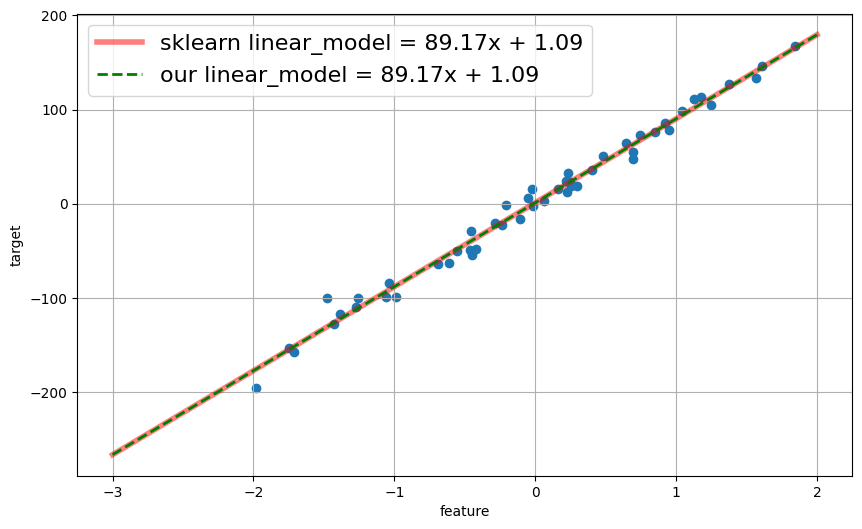

In [131]:
fig = plt.figure(figsize=(10, 6))

x = np.arange(-3, 3)
our_model_y = our_a * x + our_b
sk_model_y = skl_a * x + skl_b

plt.plot(x, sk_model_y, linewidth=4, alpha=0.5, c='r', label=f'sklearn linear_model = {skl_a:.2f}x + {skl_b:.2f}')
plt.plot(x, our_model_y, '--g', linewidth=2, label=f'our linear_model = {our_a:.2f}x + {our_b:.2f}')
plt.scatter(X, y) 
plt.grid()
plt.xlabel('feature')
plt.ylabel('target')
plt.legend(prop={'size': 16})
plt.show()

### Прямые нашей и оригинальной моделей накладываются друг на друга, что говорит об их идентичности